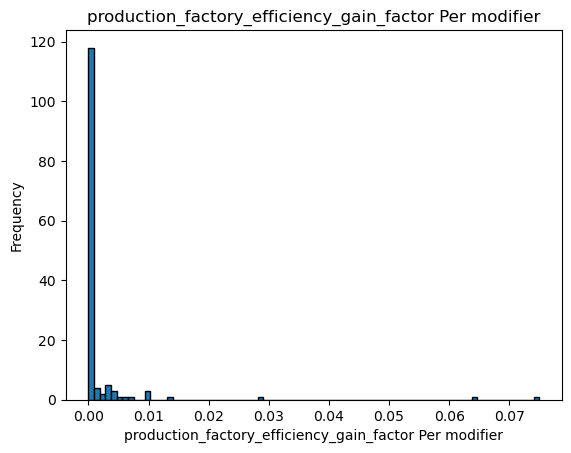

,Filename,Sum of production_factory_efficiency_gain_factor,Occurrences of production_factory_efficiency_gain_factor,Focus Count,Per Occurrence of production_factory_efficiency_gain_factor,production_factory_efficiency_gain_factor Per modifier
0,MEN.txt,0.3,1,4,0.300000,0.075000
1,belgium.txt,0.9,3,14,0.300000,0.064286
2,britain.txt,0.9,9,31,0.100000,0.029032
3,PRC_SOV_50s.txt,0.3,3,22,0.100000,0.013636
4,WGR_Ideas.txt,1.3,9,127,0.144444,0.010236
...,...,...,...,...,...,...
137,generic_foci.txt,0.0,0,237,0.000000,0.000000
138,French_Ministers.txt,0.0,0,0,0.000000,0.000000
139,French_Colonial_Ideas.txt,0.0,0,100,0.000000,0.000000
140,frankreich_ideas.txt,0.0,0,20,0.000000,0.000000


In [42]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

FILE_PATH = "C:/Users/Luke/Documents/GitHub/ColdWarIronCurtain/Cold War Iron Curtain/common/ideas"
TARGET_STRING = 'production_factory_efficiency_gain_factor'
# add_political_power
# arms_factory
PER_STRING = 'modifier = {'

SUM_COL_TITLE = f'Sum of {TARGET_STRING}'
PER_OCC_COL_TITLE = f'Per Occurrence of {TARGET_STRING}'
PER_STRING_COL_TITLE = f'{TARGET_STRING} Per {PER_STRING[:-4]}'

INVESTIGATION = PER_STRING_COL_TITLE

def process_file(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    matches = re.findall(rf'{TARGET_STRING}\s*=\s*([0-9]*\.?[0-9]+|[a-zA-Z_]+)', content)
    sum_numbers = sum(float(m) for m in matches if m.replace('.', '').isdigit())

    return sum_numbers, len(matches), content.count(PER_STRING)

def process_files_to_dataframe(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            file_path = os.path.join(directory, filename)
            data.append([filename, *process_file(file_path)])

    df = pd.DataFrame(data, columns=['Filename', f'Sum of {TARGET_STRING}', f'Occurrences of {TARGET_STRING}', 'Focus Count'])

    df[PER_OCC_COL_TITLE] = df.iloc[:, 1] / df.iloc[:, 2].replace(0, 1)
    df[PER_STRING_COL_TITLE] = df.iloc[:, 1] / df.iloc[:, 3].replace(0, 1)

    return df.sort_values(by=f'{INVESTIGATION}', ascending=False).reset_index(drop=True)

def plot_histogram(data, title):
    plt.hist(data, bins=80, edgecolor='black')
    plt.title(title)
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.show()

df_sorted = process_files_to_dataframe(FILE_PATH)
plot_histogram(df_sorted[INVESTIGATION], INVESTIGATION)
df_sorted